In [54]:
#This file is for predicting energy cost for renewable energy.

In [55]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [57]:
df = pd.read_csv('/Users/stone/Documents/GitHub/India-Energy-Analytics-Model/Book.csv')

In [58]:
import pandas as pd
import sklearn as sk

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [61]:
X = df.drop('Average Electricity Cost', axis=1)  # Features
y = df['Average Electricity Cost']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [63]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.15056348132731903


In [64]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df' and has a column 'Average Electricity Cost'

# Shift the 'Average Electricity Cost' column by one row to compare with the next row
df['Previous_Price'] = df['Average Electricity Cost'].shift(1)

# Create a new column to indicate price change (1 for increase, 0 for decrease)
df['Price_Change'] = np.where(df['Average Electricity Cost'] > df['Previous_Price'], 1, 0)


<Axes: xlabel='Price_Change'>

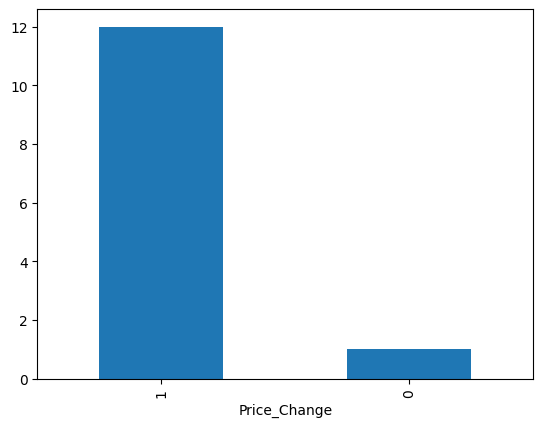

In [65]:
df['Price_Change'].value_counts().plot(kind='bar')  


In [66]:
print(df['Price_Change'].value_counts())  # Print value counts
df['Price_Change'].describe()  # Descriptive statistics


Price_Change
1    12
0     1
Name: count, dtype: int64


count    13.000000
mean      0.923077
std       0.277350
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Price_Change, dtype: float64

In [70]:
print(df.isnull().sum())  # Check for missing values in all columns


Year                        0
Average Electricity Cost    0
Previous_Price              1
Price_Change                0
dtype: int64


In [72]:
print(df['Price_Change'].isnull().sum())


0


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Example with Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [71]:
# Assuming your DataFrame is named 'df' and has columns 'Average Electricity Cost' and 'Previous_Price'

df['Price_Change'] = np.where(df['Average Electricity Cost'] > df['Previous_Price'], 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()  # Or consider Random Forest or SVM if data is imbalanced
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)  # Print the model's accuracy


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

In [67]:
import pandas as pd

df['Previous_Price'] = df['Average Electricity Cost'].shift(1)


df['Price_Change'] = np.where(df['Average Electricity Cost'].isna(), 0,  #
                              np.where(df['Average Electricity Cost'] > df['Previous_Price'], 1, 0))


In [68]:
X = df[['Year', 'Average Electricity Cost']]  # Replace with your features
y = df['Price_Change']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)